In [1]:
import pickle
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def getClassPrediction(model_path, X_test):
    model = load_model(model_path)
    
    predictions = model.predict(X_test)
    predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]
    predictions = np.array(predictions)
    
    return predictions

In [3]:
def getClassTest(y_test):
    labels = [np.argmax(Y_test[i]) for i in range(len(Y_test))]
    labels = np.array(labels)
    
    return labels

In [4]:
final_model_path = "./FinalModel-2/"
data_path = "data/splitted/data_target/"

X_test = np.load(data_path + "X_test.npy")
Y_test = Y_test = np.load(data_path + "Y_test.npy")

X_test = np.expand_dims(X_test, axis=2)

In [7]:
def modelEvaluation(labels, predictions):
    print ("Accuracy: " + str(100*metrics.accuracy_score(labels, predictions)))
    print ("Precision: " + str(100*metrics.precision_score(labels, predictions, average="weighted")))
    print ("Recall: " + str(100*metrics.recall_score(labels, predictions, average="weighted")))
    print ("f1_score: " + str(100*metrics.f1_score(labels, predictions, average="weighted")))

In [8]:
def plotConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar(fraction=0.045)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Classes', fontsize=16)
    plt.xlabel('Predicted Classes', fontsize=16)

In [10]:
def analyzeModel(model_path, x_test, y_test, title="No Title"):
    cls_pred = getClassPrediction(model_path, x_test)
    cls_test = getClassTest(y_test)

    print
    print ("Evaluasi: " + title)
    modelEvaluation(cls_test, cls_pred)
    print
    
    cnf_matrix = confusion_matrix(cls_test, cls_pred)
    np.set_printoptions(precision=2)

    class_name = "ABCDEFGHIJKLMNOPQRSTUV"
    plt.figure(figsize=(10, 10))
    plotConfusionMatrix(cnf_matrix, classes=class_name, 
                        title=title)
    plt.show()

Evaluasi: Confusion Matrix dari Model Tanpa Transfer Learning
Accuracy: 94.3722943723
Precision: 95.1587301587
Recall: 94.3722943723
f1_score: 94.2873111304


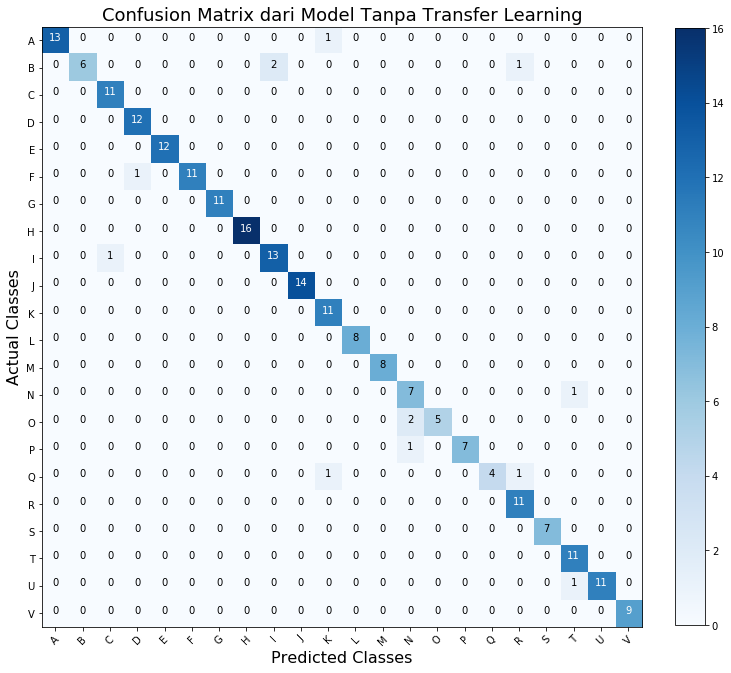

In [11]:
# Analisis model tanpa transfer learning
analyzeModel(final_model_path + "data-target-model-wtl.h5",
            X_test, Y_test,
            title="Confusion Matrix dari Model Tanpa Transfer Learning")

Evaluasi: Confusion Matrix dari Model Transfer Learning Skenario 1
Accuracy: 92.2077922078
Precision: 93.1686567401
Recall: 92.2077922078
f1_score: 92.2185518506


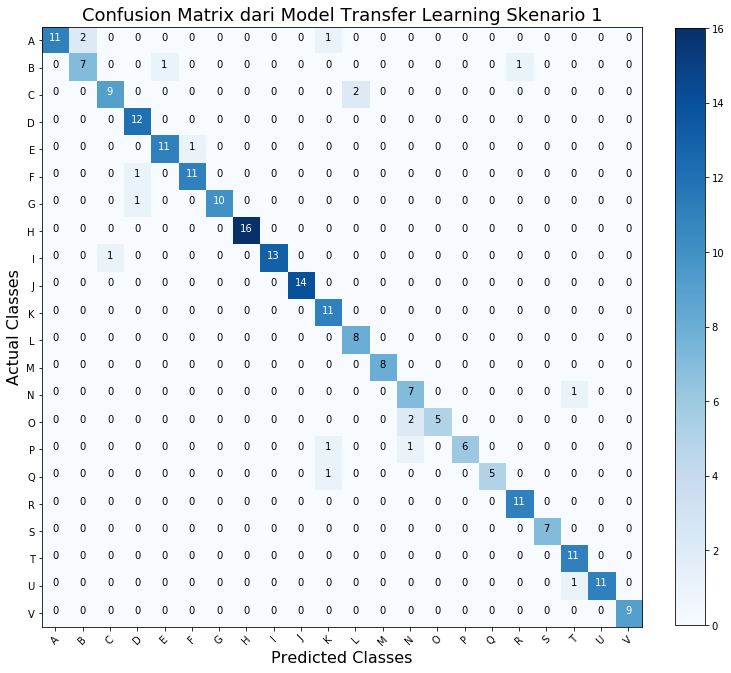

In [13]:
# Analisis model transfer learning skenario 1
analyzeModel(final_model_path + "data-target-model-tl-1.h5",
            X_test, Y_test,
            title="Confusion Matrix dari Model Transfer Learning Skenario 1")

Evaluasi: Confusion Matrix dari Model Transfer Learning Skenario 2
Accuracy: 95.670995671
Precision: 96.2493062493
Recall: 95.670995671
f1_score: 95.6518288227


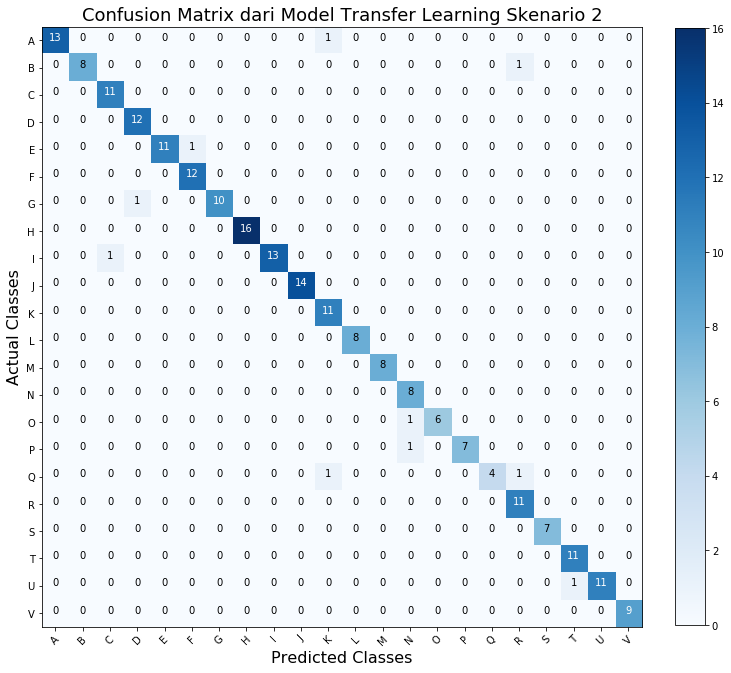

In [14]:
# Analisis model transfer learning skenario 2
analyzeModel(final_model_path + "data-target-model-tl-2.h5",
            X_test, Y_test,
            title="Confusion Matrix dari Model Transfer Learning Skenario 2")